In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [39]:
dataset = pd.read_csv('/content/salary.csv')

In [37]:
dataset.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0


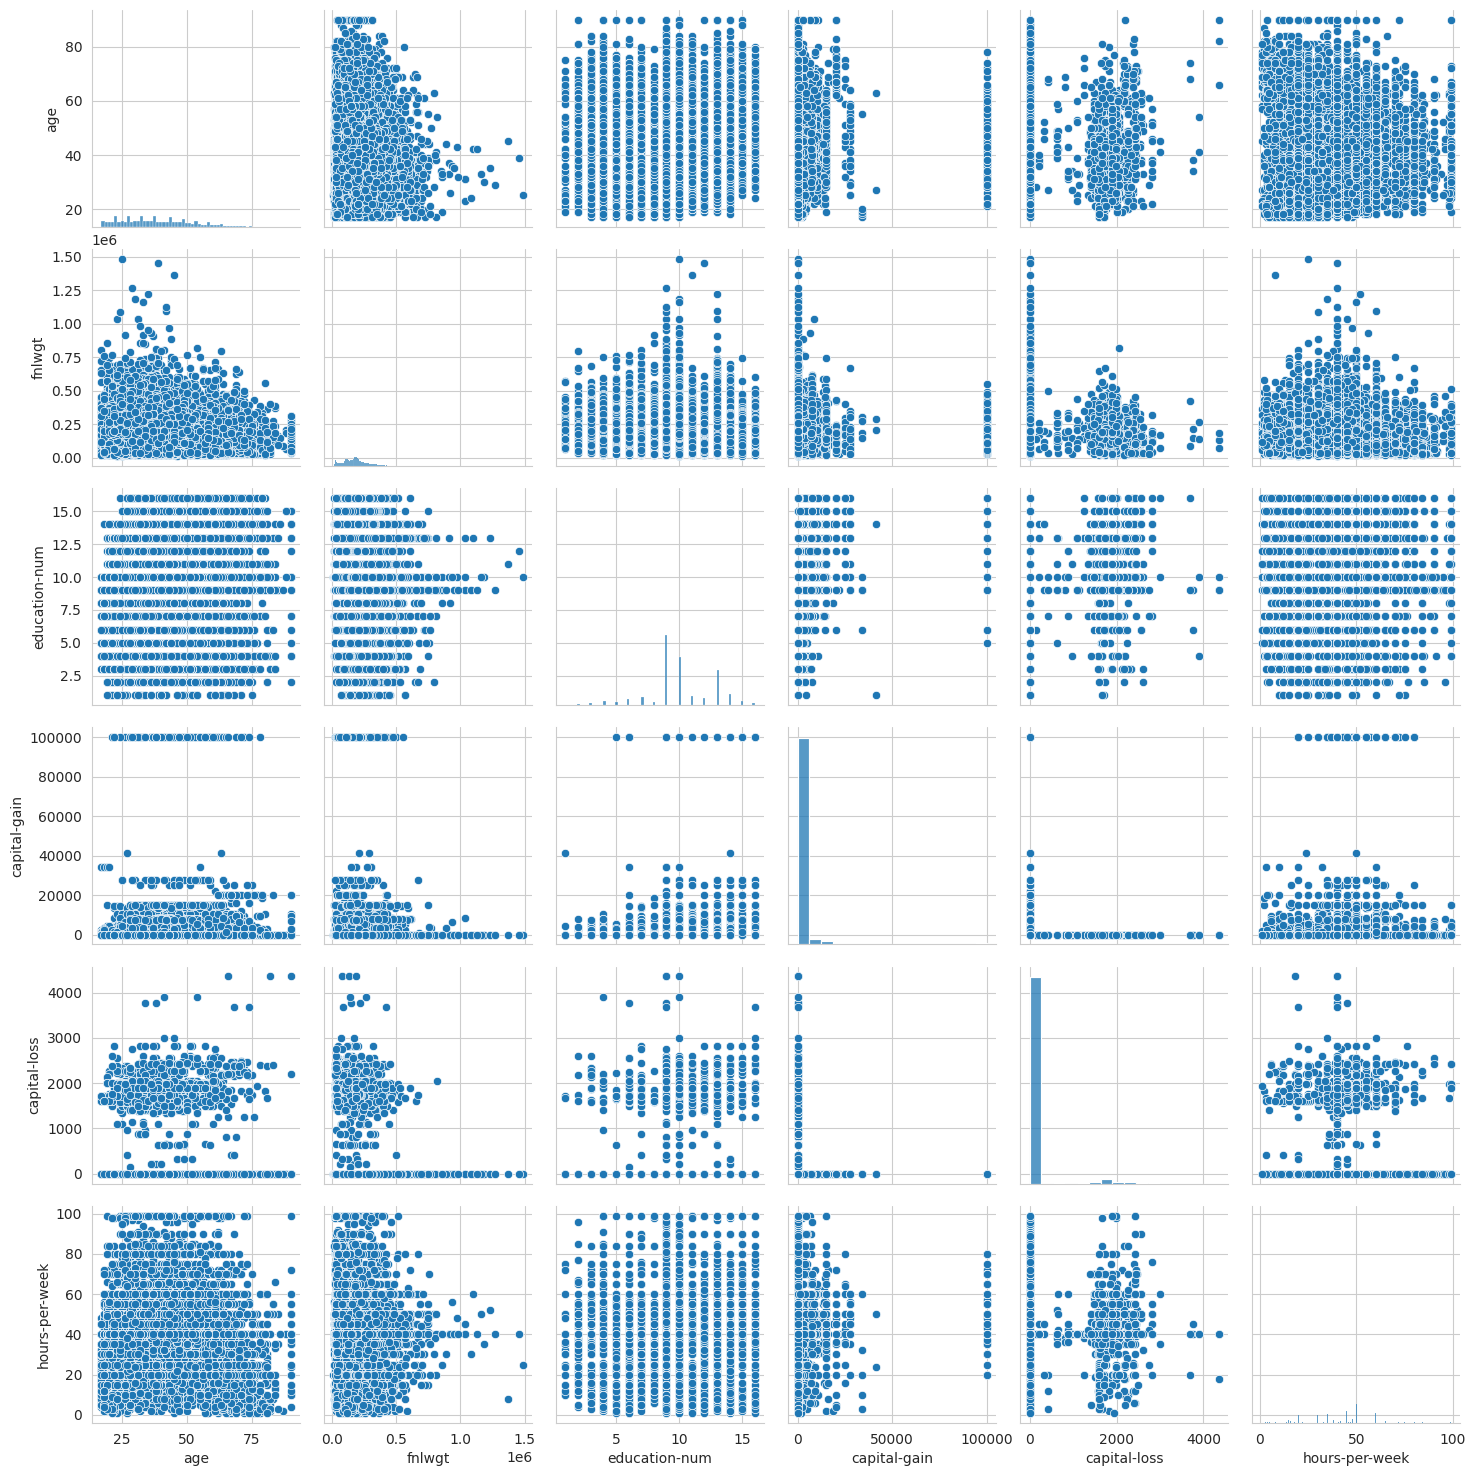

In [40]:
# Pairwise plot all data
sns.pairplot(dataset)

<Axes: xlabel='salary', ylabel='Count'>

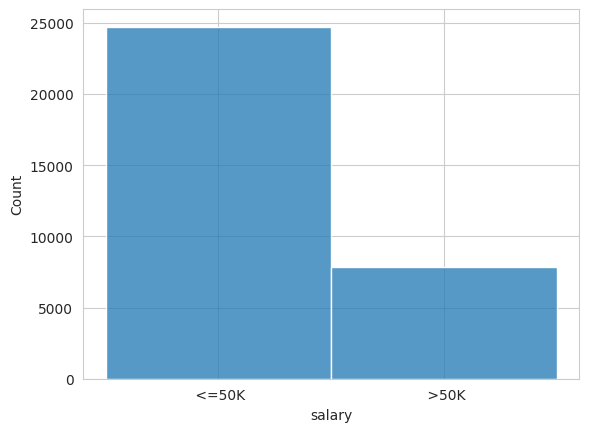

In [27]:
# draw a histplot for price
sns.histplot(dataset['salary'])

<ipython-input-28-1cf79847c28c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(),annot=True)


<Axes: >

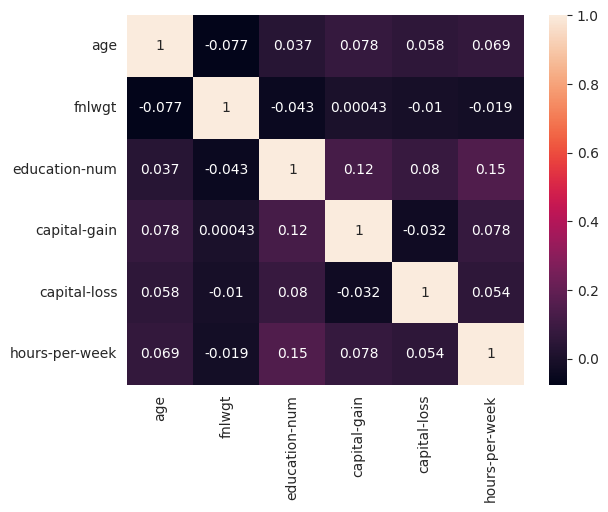

In [28]:
# plot a heatmap for the correlation
sns.heatmap(dataset.corr(),annot=True)

In [29]:
dataset.corr()

<ipython-input-29-c187c74d1e71>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset.corr()


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
education-num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
capital-gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
capital-loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
hours-per-week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


In [30]:
dataset['workclass']=dataset["workclass"].astype('category').cat.codes
dataset['marital-status']=dataset["marital-status"].astype('category').cat.codes
dataset['occupation']=dataset["occupation"].astype('category').cat.codes
dataset['relationship']=dataset["relationship"].astype('category').cat.codes
dataset['race']=dataset["race"].astype('category').cat.codes
dataset['sex']=dataset["sex"].astype('category').cat.codes
dataset['native-country']=dataset["native-country"].astype('category').cat.codes
dataset['salary']=dataset["salary"].astype('category').cat.codes
dataset['education']=dataset["education"].astype('category').cat.codes
dataset

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,257302,7,12,2,13,5,4,0,0,0,38,39,0
32557,40,4,154374,11,9,2,7,0,4,1,0,0,40,39,1
32558,58,4,151910,11,9,6,1,4,4,0,0,0,40,39,0
32559,22,4,201490,11,9,4,1,3,4,1,0,0,20,39,0


In [31]:
x = dataset.drop("salary", axis = 1)
y = dataset["salary"]

In [32]:
#Splitting into test and train data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=101)

In [ ]:
#importing the Linear Regression Algorithm
from sklearn.linear_model import LinearRegression

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [33]:
#creating LinearRegression Object
linear_regressor = LinearRegression()

# fitting the dataset
linear_regressor.fit(x_train,y_train)

# get predictions
y_pred = linear_regressor.predict(x_test)

In [34]:
#INFERENCE
#["housing_median_age","total_rooms","total_bedrooms","population","households","median_income", "ocean_proximity", "median_house_value"]
test_entry=[39,7,77516,9,13,4,1,1,4,1,2174,0,40,39]

linear_regressor.predict([test_entry])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([0.36934902])

In [35]:
# get mse, mae, rmse, r2 score for the predictions
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:',metrics.r2_score(y_test,y_pred))

MAE: 0.29236063113687066
MSE: 0.13233638938413753
RMSE: 0.36378068858054785
R2 Score: 0.2701411168928778


In [36]:
correlation = np.corrcoef(y_test,y_pred)[0,1]
correlation

0.5199992702635785